# Virtual Internship Program (VIP) by AINE AI

# Project Title: Machine Learning for Predictive Analytics
Aim: Reducing monthly churn by identifying high risk customers well in advance


Aim: 
1. Build a classification model to predict churners one month in advance
2. Identify key churn drivers. 

Hypothesis: Company CEO believes that existing models can predict churners precisely, but it’s too late to take any retention actions, as customer usage has significantly declined by then.

Objectives/Exercise:

1. Perform initial data preparation
2. Number of customers with zero monthly revenue?
3. Number of customers with missing values percentage > 5%?
4. Remove outliers for columns ‘UniqueSubs’ and ‘DirectorAssistedCalls’ is any.
5. Perform exploratory analysis to analyse customer churn
6. Do customers with high overage minutes also have high revenue?
7. Does high number of active subscribers lead to low monthly revenue?
8. Does credit rating have an impact on churn rate?
9. Create additional features to help predict churn
10. Percent of current active subs over total subs
11. Percent of recurrent charge to monthly charge
12. Percent of overage minutes over total monthly minutes
13. Build classification model to predict customer churn
14. Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set
15. Build Random Forest classifier to compare model accuracy over the logistic regression model
16. Identify most important features impacting churn (Model evaluation metrics to be used: GINI, AUC, Precision and Recall)
17. Use the ‘Prediction Data’ provided to predict churners using the best model identified
18. Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model



### By: Kaustav Roy

## Packages and setup

#### Importing necessary libraries 

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

<b>Importing dataset

In [ ]:
#edit the file location of raw data set
cust_df=pd.read_csv("/Telecom Data.csv")

## Exploring the dataset 

<b>Shape of the dataset

In [ ]:
cust_df.shape

(51047, 58)

<b>Size, Summary, Dimension and Length of the dataset 

In [ ]:
cust_df.size

2960726

In [ ]:
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [ ]:
cust_df.ndim

2

In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
len(cust_df)

51047

In [ ]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


#### No of Customer having zero Monthly Revenue 

In [ ]:
## Customers with Zero Monthly Revenue
cust_df[cust_df['MonthlyRevenue']<=0]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.00,2.0,0.0,0.00,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,2,NMXELP915,2.0,2.0,597.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.00,55.0,0.0,0.00,0.0,0.0,NaN,NaN,0.0,0.0,1.3,5.3,0.0,7.1,0.7,0.7,11.3,2.0,0.0,0.0,0.0,26,2,2,SANSAN210,3.0,3.0,371.0,28.0,30.0,No,No,Yes,No,No,Unknown,No,Yes,No,No,No,Yes,0,0,No,Yes,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
26596,3210322,No,-2.52,211.0,0.0,0.33,0.0,0.0,NaN,NaN,0.0,0.0,7.3,1.3,0.0,1.7,8.0,1.3,12.7,17.0,0.0,0.0,0.0,18,2,2,KCYKCK913,2.0,2.0,281.0,0.0,0.0,No,Yes,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,3-Good,Suburban,Other,Unknown
33352,3265738,No,-5.86,0.0,-5.0,0.00,0.0,0.0,0.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,3,3,NEVLVS702,1.0,1.0,452.0,34.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,No,0,0,No,No,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Yes
42051,3334666,No,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2,2,OKCOKC405,1.0,1.0,307.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
48038,3378298,No,-6.17,0.0,-6.0,0.00,0.0,0.0,0.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,1,NYCSUF516,1.0,1.0,203.0,0.0,0.0,No,Yes,Yes,No,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,6,No,0,Unknown,No,7-Lowest,Suburban,Other,No
49920,3391282,No,0.00,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59,2,2,NEVCHU619,2.0,2.0,866.0,26.0,0.0,No,No,No,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.00,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,55,1,1,NEVOCN760,1.0,1.0,1671.0,42.0,36.0,No,No,No,No,No,Known,No,No,No,No,No,No,0,0,No,No,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,Unknown,No,2-High,Other,Professional,No


<b>No of Customers with zero Montly revenue = 9

In [ ]:
print(cust_df['MonthlyRevenue'].isnull().sum())

156


<b>Solution : Number of customers having NaN monthly revneue = 156

In [ ]:
#removing customers with zero and NaN monthly revenue 
df = cust_df
df.dropna(subset=["MonthlyRevenue"], inplace = True) 

In [ ]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,1,NEVPOW619,1.0,1.0,882.0,NaN,NaN,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,30,No,5-Low,Other,Professional,Yes


<b> After removing null values and NaN in MonthlyRevenue Column 

In [ ]:
print(df['MonthlyRevenue'].isnull().sum())

0


### Number of columns has missing values percentage > 5%

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}) 
missing_value_df


,column_name,percent_missing
CustomerID,CustomerID,0.000000
Churn,Churn,0.000000
MonthlyRevenue,MonthlyRevenue,0.000000
MonthlyMinutes,MonthlyMinutes,0.000000
TotalRecurringCharge,TotalRecurringCharge,0.000000
DirectorAssistedCalls,DirectorAssistedCalls,0.000000
OverageMinutes,OverageMinutes,0.000000
RoamingCalls,RoamingCalls,0.000000
PercChangeMinutes,PercChangeMinutes,0.414612
PercChangeRevenues,PercChangeRevenues,0.414612


<mark>__Result:__

1. From the above result we can see that, no columns in the dataframe has a missing percentage of data greater than 5%, it's less than 2%
2. Some of the imputations that can be used to handle missing values in a dataset are 
        a. Delete Rows with Missing Values, but it looses a lot of data, not 
           suitable for columns having more missing percentage 
        b. Impute missing values with Mean/Median, 
           But works only with numerical continuous variables.
           Can cause data leakage
        c. Using Algorithms that support missing values like KNN or Naive Bayes.
        d. Prediction of missing values using Regression or Classification. 

#### Removing outliers for columns, "UniqueSubs" and "DirectorAssistedCalls" if any

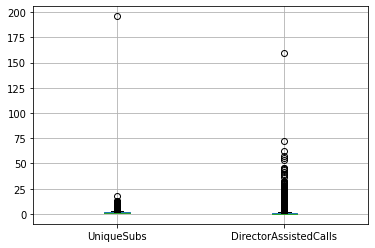

In [ ]:
#box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

<b> Finding top 1% outliers in both the columns using quantile function 

In [ ]:
qValue = [i / 100 for i in range(95,101,1)]
df["UniqueSubs"].quantile(qValue)

0.95      3.0
0.96      3.0
0.97      4.0
0.98      4.0
0.99      5.0
1.00    196.0
Name: UniqueSubs, dtype: float64

In [ ]:
qValue = [i / 100 for i in range(95,101,1)]
df["DirectorAssistedCalls"].quantile(qValue)

0.95      4.21
0.96      4.70
0.97      5.69
0.98      6.93
0.99      9.65
1.00    159.39
Name: DirectorAssistedCalls, dtype: float64

In [ ]:
df[df.UniqueSubs >= 196]
df[df.DirectorAssistedCalls>= 159.39]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
23267,3183090,Yes,67.74,0.0,85.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,196,53,NCRCHA704,1.0,1.0,430.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
5970,3046638,No,521.61,7359.0,210.0,159.39,1040.0,1.9,-1070.0,-154.8,117.3,9.0,326.0,7.7,4.3,1957.6,179.0,41.0,1591.0,803.7,126.3,0.0,182.0,31,2,1,BOSBOS617,19.0,9.0,58.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,6,No,0,60,No,5-Low,Other,Other,No


In [ ]:
df = df.drop(23267)

In [ ]:
df = df.drop(5970)

<b> Re-plotting to check for the outliers 

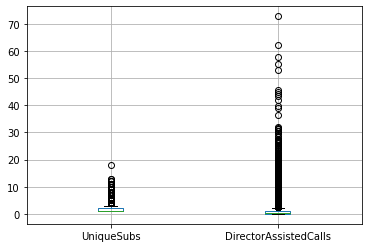

In [ ]:
cols=["UniqueSubs","DirectorAssistedCalls"]
df.boxplot(column=cols)

In [ ]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,1,NEVPOW619,1.0,1.0,882.0,NaN,NaN,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,30,No,5-Low,Other,Professional,Yes


##Exploratory Data Analysis for prediction of Customer Churn

#### **Analyzing overage minutes and high revenue**

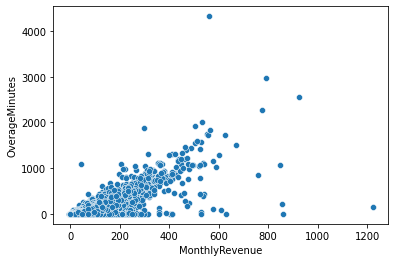

In [ ]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

In [ ]:
column_1 = df["MonthlyRevenue"]
column_2 = df["OverageMinutes"]
correlation = column_1.corr(column_2)
print(correlation)

0.7873878505652222


<mark>__Result:__

1. From the above graph we can find that, the attributes MonthlyRevenue and Overage Minutes have a strong positive correlation which is 0.787 and it tends to +1. 
2. Thus, both the variables move in the same direction. 
3. Thus, if the customer works an extra time other than the pre paid allocation, his/her monthly revenue increases and vice versa. 
4. Thus both the variables are strongly correlated. 

#### **Analyzing active subscribers and low monthly revenue**

In [ ]:
print(df['ActiveSubs'].value_counts())

1     36182
2     12157
3      1902
4       444
5       143
0        39
6        13
8         5
7         2
11        1
9         1
Name: ActiveSubs, dtype: int64


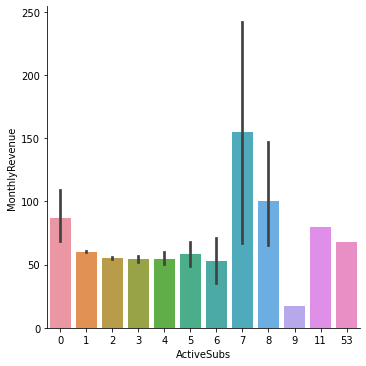

In [ ]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df, kind = 'bar')

<mark>__Result:__
    
1. From the above plot we can see that, high active number of subscribers does not have the lowest Monthly Revenue but also not the greatest Monthly revenue. 
2. High number of active subs also have the monthly revenue between 50-100 USD

#### **Impact of credit rating in churn rate**

In [ ]:
print(df['CreditRating'].value_counts())

2-High       18992
1-Highest     8462
3-Good        8391
5-Low         6457
4-Medium      5342
7-Lowest      2101
6-VeryLow     1144
Name: CreditRating, dtype: int64


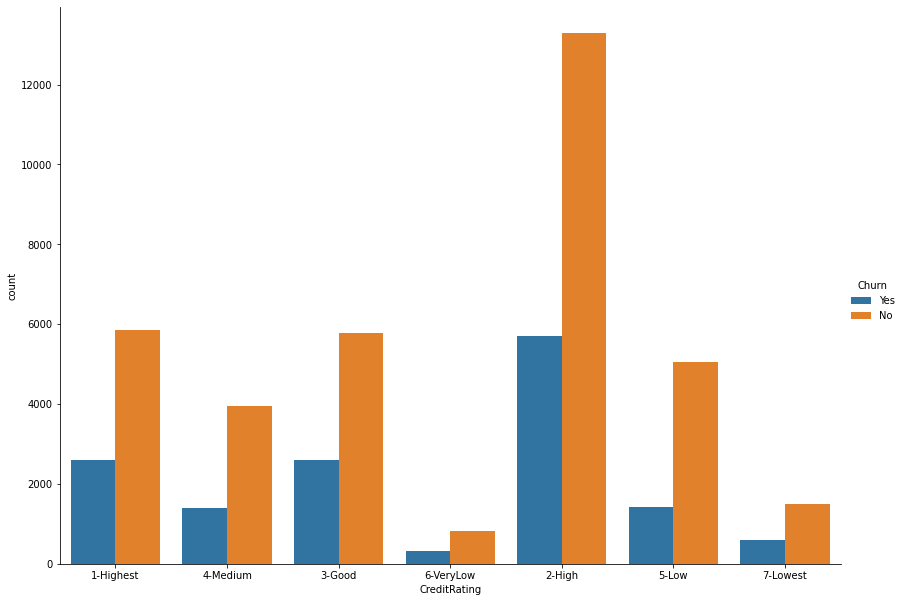

In [ ]:
sns.catplot(x = 'CreditRating', kind = 'count', hue = "Churn", data = cust_df, height=8.27, aspect=11.7/8.27)

<mark>__Result:__
    
1. People having high credit rating has the highest churn rate. 
2. People having the lowest credit rating has the lowest churn rate. 
3. People having high credit rating has a higher chances not to churn. 
4. People having the lowest credit rating is least likely to churn. 

## Additional exploratory analysis to analyze customer churn 

<b>Target variable distribution : shows the dataset is imbalanced. 

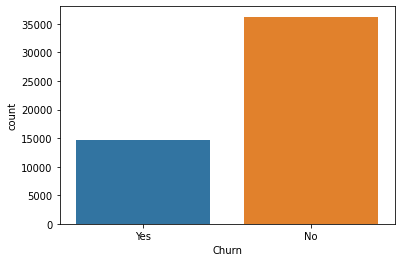

In [ ]:
sns.countplot(x=df.Churn)

<b><h4>Lets visualize distribution of numeric variables with repect to Churn.<br>
      I don't see any striking patterns though

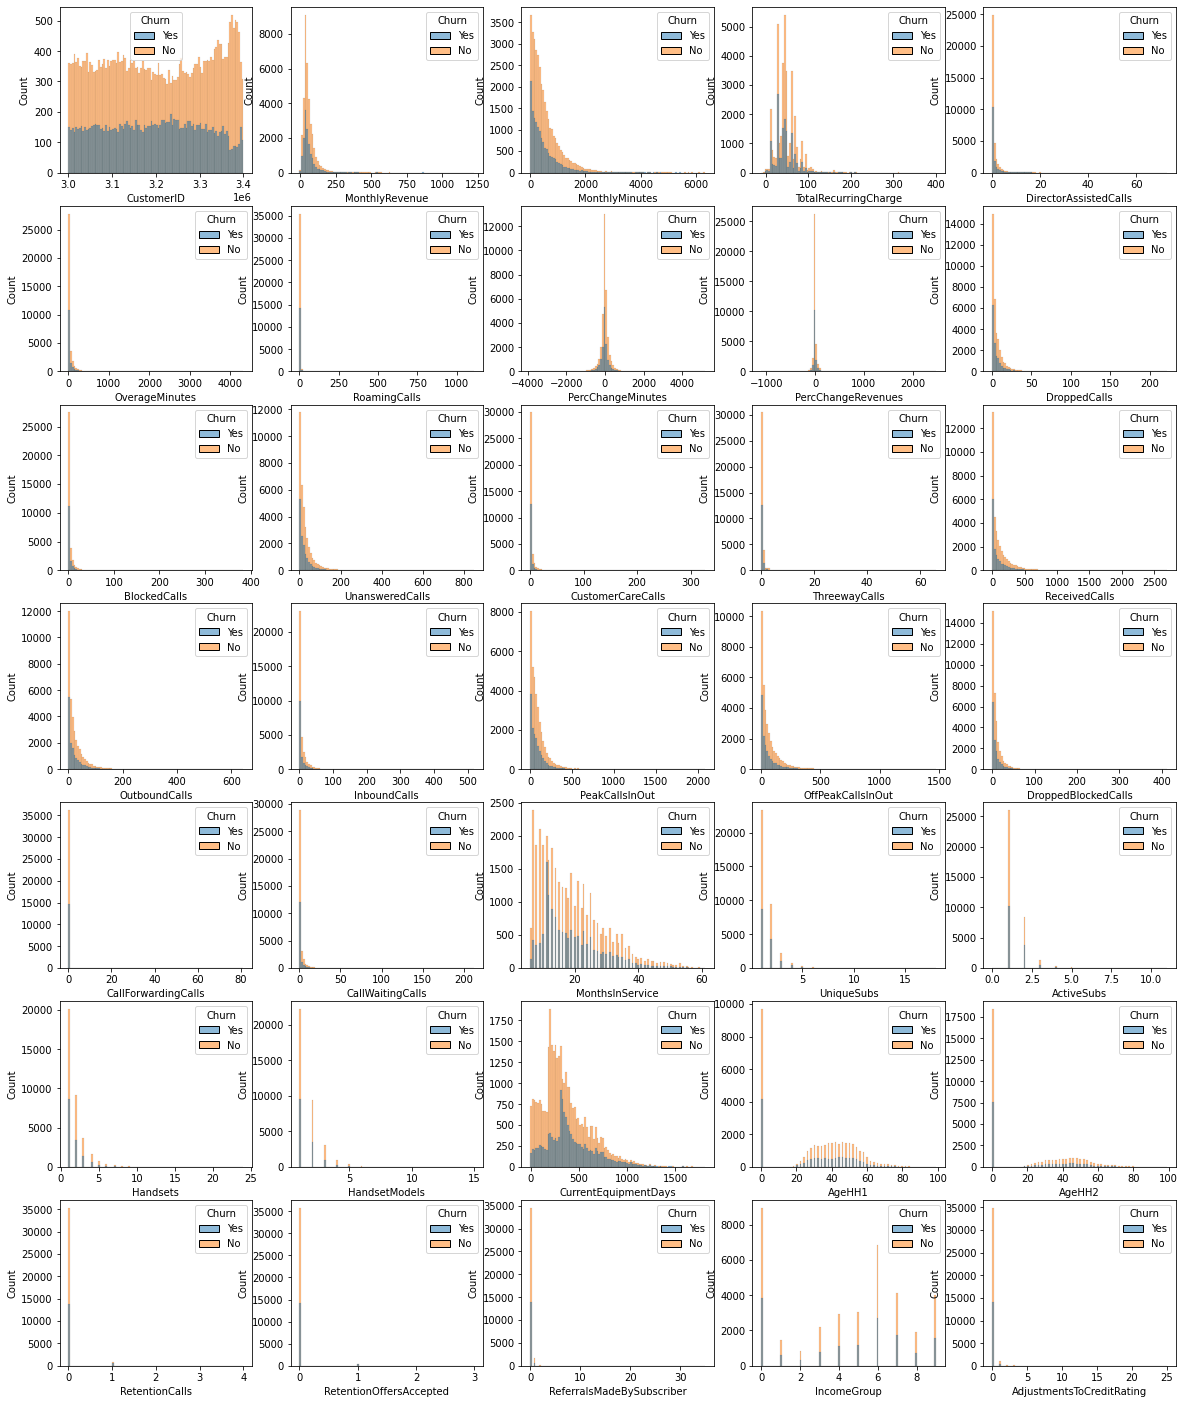

In [ ]:
plots_per_row = 5

number_of_plots = df.select_dtypes(exclude=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 

axes = axes.flatten()
i = 0
for index,col in df.select_dtypes(exclude=['object']).columns.to_series().items():    
    a = sns.histplot(data=df, x=col, hue="Churn", ax=axes[i],kde=False,bins=100)
    i+=1
    
for i in range(1,len(axes)-number_of_plots+1):
    fig.delaxes(axes[-i]) # remove empty subplot
# plt.tight_layout()

fig.set_figwidth(20)
fig.set_figheight(25)

plt.show()

<b><h4>Lets look at categorical variables

In [ ]:
df.select_dtypes(include=['object']).describe()

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,50889,50865,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889,50889
unique,2,747,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,16,2,7,4,8,3
top,No,NYCBRO917,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,No,No,No,Unknown,No,2-High,Other,Other,Unknown
freq,36249,1682,38551,43831,45932,41373,46737,33878,32486,31716,50140,48018,41456,34397,41080,43869,50211,28918,49156,18992,24565,37524,19642


ServiceArea has high cardinality (747 unique values). 

<b><h4>Visualize distribution of categorical variables with respect to Churn<br>
       I don't see any striking patterns here too

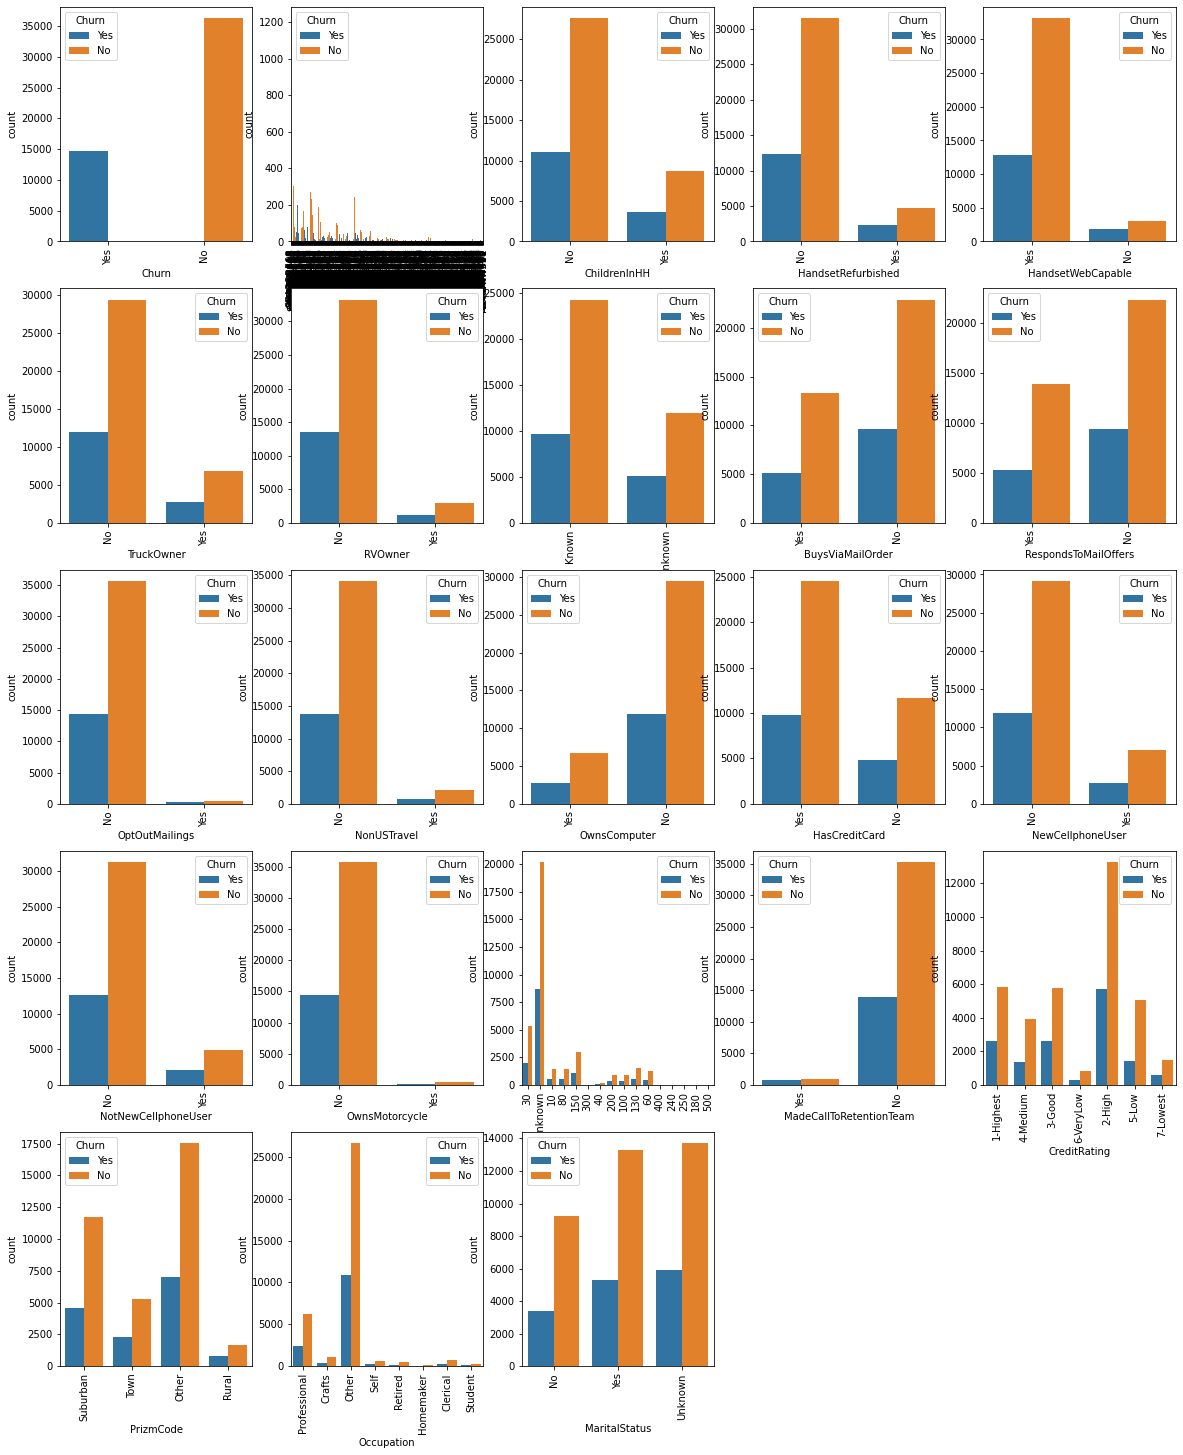

In [ ]:
plots_per_row = 5

number_of_plots = df.select_dtypes(include=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 

axes = axes.flatten()
i = 0
for index,col in df.select_dtypes(include=['object']).columns.to_series().items():
    
    a = sns.countplot(x=df[col],hue=df.Churn,ax=axes[i])
    a.tick_params(axis='x', labelrotation= 90)
    i+=1
    
for i in range(1,len(axes)-number_of_plots+1):
    fig.delaxes(axes[-i]) # remove empty subplot
# plt.tight_layout()

fig.set_figwidth(20)
fig.set_figheight(25)

plt.show()

<b><h4>Lets look at count of null values in the dataset. Fortunately there are no nulls in the target variable

In [ ]:
null_rows_selector = df.isnull().any(axis=1)
null_row_count = df[null_rows_selector].shape[0]

df_null = df.isnull().groupby(df.Churn).sum().transpose()
df_null['total'] = df.isnull().sum()
df_null['percent'] = (df_null['total']/len(df))*100
df_null = df_null[df_null.total!=0]

print("rows with null values:",null_row_count,", {:.2f}%".format((null_row_count/len(df))*100))
print('columns with null values:',df_null.shape[0])

df_null

rows with null values: 1139 , 2.24%
columns with null values: 8


Churn,No,Yes,total,percent
PercChangeMinutes,73,138,211,0.414628
PercChangeRevenues,73,138,211,0.414628
ServiceArea,12,12,24,0.047161
Handsets,1,0,1,0.001965
HandsetModels,1,0,1,0.001965
CurrentEquipmentDays,1,0,1,0.001965
AgeHH1,658,247,905,1.778380
AgeHH2,658,247,905,1.778380


In [ ]:
churn_df=df[df['Churn']=='Yes']
non_churn_df= df[df['Churn']=='No']
churned= df[df['Churn']=='Yes'].shape[0]
notchurned= df[df['Churn']=='No'].shape[0]
print("Total Churned customer {} ".format(churned))

Total Churned customer 14640 


<b><h4>Let's plot the correlation matrix 

<Figure size 1800x1800 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix of features')

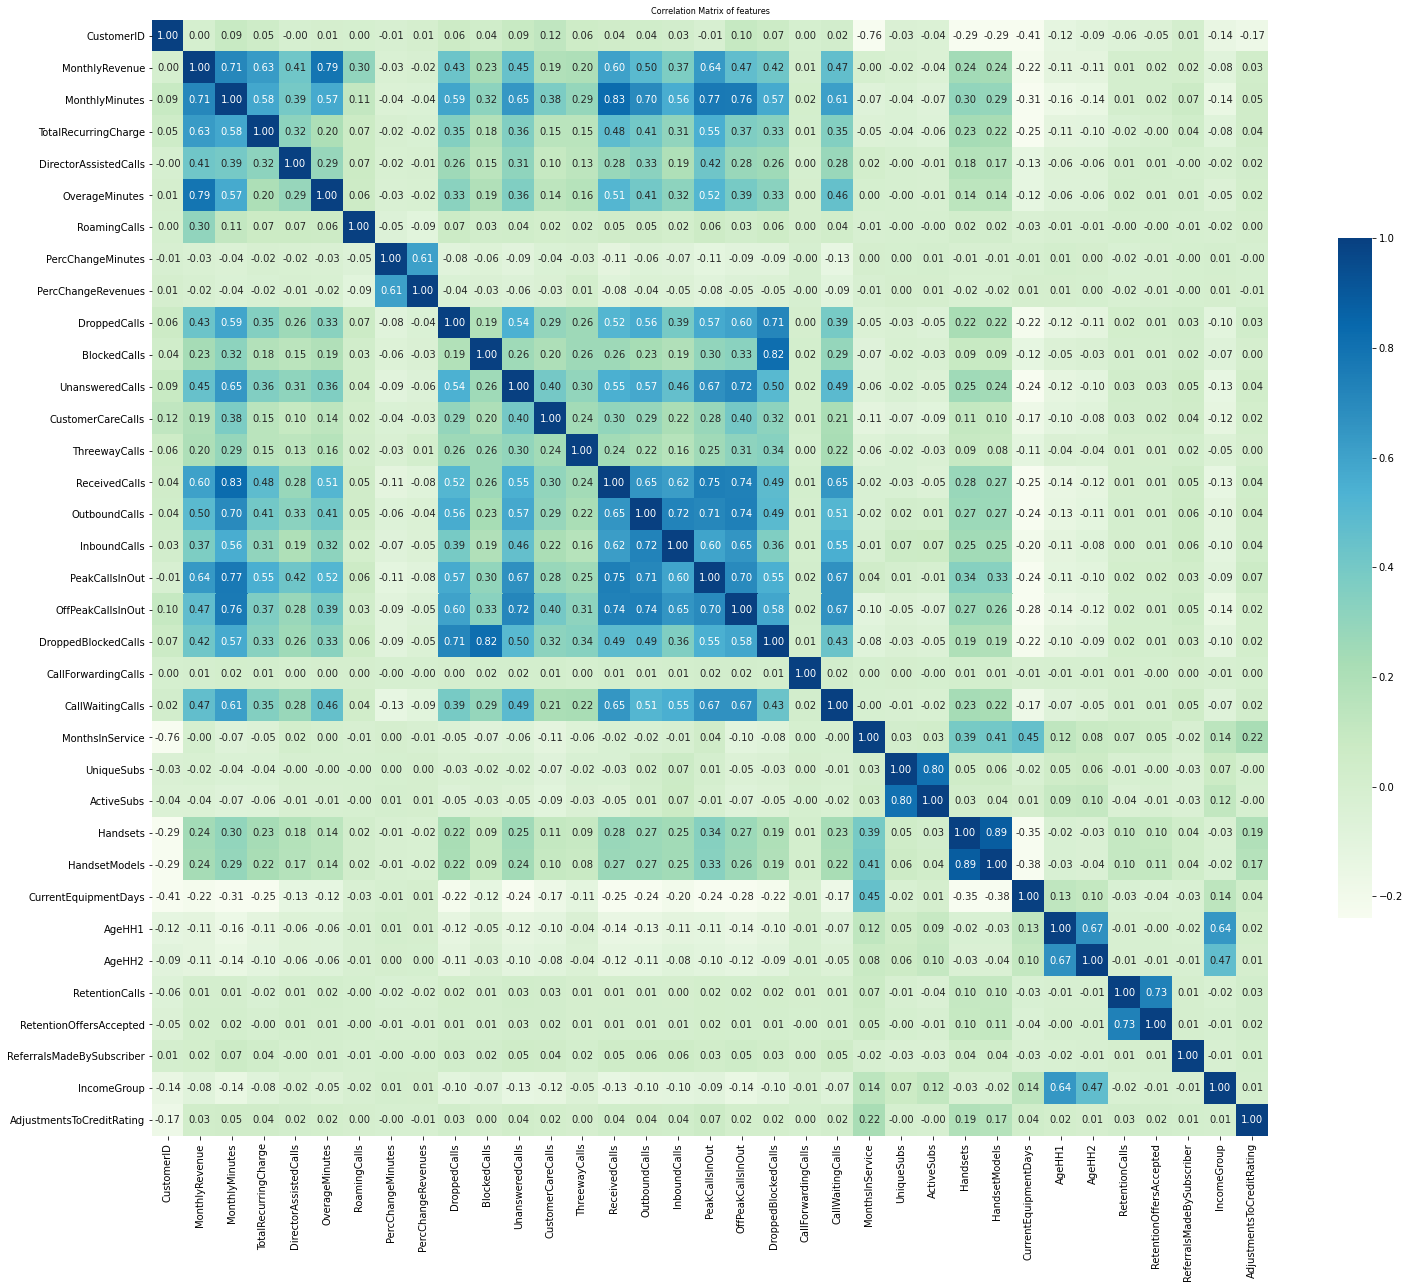

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 25))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

<b><h4>Let's find the highly correlated variables later. First let's do some visualization of the features in the dataset!!

<b><h4> Let's plot the Revenue distribution of the customers 

(array([1.8786e+04, 1.3454e+04, 2.6410e+03, 8.1600e+02, 2.9000e+02,
        1.2100e+02, 4.9000e+01, 2.5000e+01, 2.2000e+01, 1.7000e+01]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
 <a list of 10 Patch objects>)

(array([7.763e+03, 5.264e+03, 1.022e+03, 3.690e+02, 1.200e+02, 5.500e+01,
        2.200e+01, 1.000e+01, 3.000e+00, 2.000e+00]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'No of customers')

Text(0.5, 0, 'Monthly revenue')

Text(0.5, 1.0, 'Revenue Distribution')

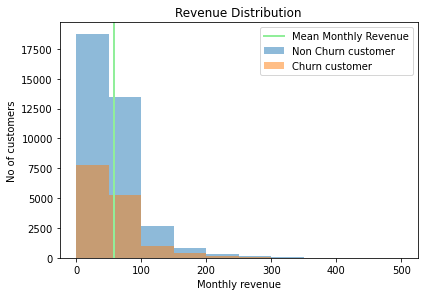

In [ ]:
non_churn_df['MonthlyRevenue'].fillna(non_churn_df['MonthlyRevenue'].mean(),inplace=True)
churn_df['MonthlyRevenue'].fillna(churn_df['MonthlyRevenue'].mean(),inplace=True)
plt.hist(non_churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5, label='Non Churn customer')
plt.hist(churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5,label='Churn customer')
mean_rev=df['MonthlyRevenue'].mean()
plt.axvline(mean_rev,label='Mean Monthly Revenue',color='#91ee9a',linewidth=2)
plt.ylabel("No of customers")
plt.xlabel("Monthly revenue")
plt.legend()
plt.tight_layout()
plt.title('Revenue Distribution')
plt.show()

1. Looks like the mean montly revenue lies between 0 and 1000 USD. 
2. High number of customers have their Monthly revenue less than the mean value. 
3. Thus, customers with low revenue tend to churn than other customers. 

<b><h4>Percentage of subscribers churned 

([<matplotlib.patches.Wedge at 0x7f551cbb93d0>,
 [Text(-1.0295014047929556, 0.3874620723752599, 'Not Churned'),
  Text(1.1230924316986373, -0.42268592342452327, 'Churned')],
 [Text(-0.5615462207961576, 0.21134294856832356, '88.5%'),
  Text(0.6551372518242051, -0.2465667886643052, '11.5%')])

Text(0.5, 1.0, 'Percentage of subscribers churned')

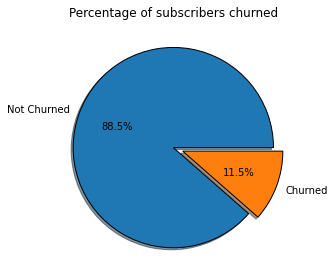

In [ ]:
df['ChurnSubs']=df['UniqueSubs']-df['ActiveSubs']
slices=[df['ActiveSubs'].sum(),df['ChurnSubs'].sum()]
labels=['Not Churned','Churned']
explode=[0,0.1]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of subscribers churned")
plt.tight_layout()
plt.show()

1. Looks like most of the active subscribers tend not to churn. 
2. Thus, it tends to have high correlation to any of the features in the dataset. 

In [ ]:
print ("No of active subscribers {}".format(df['ActiveSubs'].sum()))
print ("No of churn subscribers {}".format(df['ChurnSubs'].sum()))

No of active subscribers 68845
No of churn subscribers 8909


<b><h4>Success rate of rention calls

In [ ]:
retention_df=df[df['MadeCallToRetentionTeam']=='Yes']
print ("Total No of customer made call to CSR for retention purpose {}".format(retention_df.shape[0]))
print("No of customer churn after making call {}".format(retention_df[retention_df['Churn']=='Yes'].shape[0]))
print("No of customer retain after making call {}".format(retention_df[retention_df['Churn']=='No'].shape[0]))
print ("Sucess rate of rention call  {}".format(retention_df[retention_df['Churn']=='No'].shape[0]/retention_df.shape[0]))

Total No of customer made call to CSR for retention purpose 1733
No of customer churn after making call 780
No of customer retain after making call 953
Sucess rate of rention call  0.5499134448932487


([<matplotlib.patches.Wedge at 0x7f551cb9fb90>,
 [Text(-0.17178254675223512, 1.0865039146875248, 'Not Churned'),
  Text(0.18739925288517026, -1.185276980295357, 'Churned')],
 [Text(-0.0936995709557646, 0.592638498920468, '55.0%'),
  Text(0.10931623084968264, -0.6914115718389582, '45.0%')])

Text(0.5, 1.0, 'success rate of retention calls')

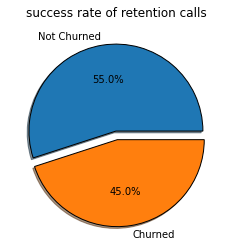

In [ ]:
slices=[retention_df[retention_df['Churn']=='No'].shape[0],retention_df[retention_df['Churn']=='Yes'].shape[0]]
labels=['Not Churned','Churned']
explode=[0,0.1]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("success rate of retention calls")
plt.show()

1. Total No of customer made call to CSR for retention purpose: 1733
2. No of customer churn after making call: 780
3. No of customer retain after making call: 953
4. Success rate of rention call:  0.5499134448932487
5. Thus a good number of customers tend to retain after making the call. 

<b><h4>Success rate of retention offer

In [ ]:
retention_offer_df=df[df['RetentionOffersAccepted']>0]
no_cust_with_ret_offer=retention_offer_df.shape[0]
print("Total customer accepted the retention offer {}".format(no_cust_with_ret_offer))
print("conversion rate customer making call for retention offer then accepting it {}"
      .format(no_cust_with_ret_offer/retention_df.shape[0]))
print("No of customer churn after accepting retention offer {}"
      .format(retention_offer_df[retention_offer_df['Churn']=='Yes'].shape[0]))
print("No of customer retain after accepting retention offer {}"
      .format(retention_offer_df[retention_offer_df['Churn']=='No'].shape[0]))
print("Success rate of  retention offer {}"
      .format(retention_offer_df[retention_offer_df['Churn']=='No'].shape[0]/no_cust_with_ret_offer))

Total customer accepted the retention offer 876
conversion rate customer making call for retention offer then accepting it 0.5054818234275822
No of customer churn after accepting retention offer 359
No of customer retain after accepting retention offer 517
Success rate of  retention offer 0.5901826484018264


<b><h4>Number of customers per Income group 

In [ ]:
income_groups=df['IncomeGroup'].unique()
income_groups.sort()
churn_customer_per_group=[]
non_churn_customer_per_group=[]
for income in income_groups:
    no_cust=churn_df[churn_df['IncomeGroup'] == income].shape[0]
    normalize_no_cust=no_cust/churn_df.shape[0]
    churn_customer_per_group.append(normalize_no_cust)
    no_cust=non_churn_df[non_churn_df['IncomeGroup'] == income].shape[0]
    normalize_no_cust=no_cust/non_churn_df.shape[0]
    non_churn_customer_per_group.append(normalize_no_cust)

Text(0, 0.5, 'No Of customers')

Text(0.5, 1.0, 'Customer per income group')

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

Text(0.5, 0, 'Income Groups')

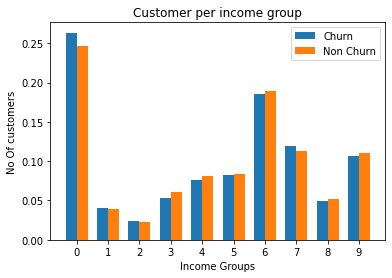

In [ ]:
x =  income_groups # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_customer_per_group, width, label='Churn')
rects2 = ax.bar(x + width/2, non_churn_customer_per_group, width, label='Non Churn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No Of customers')
ax.set_title('Customer per income group')
ax.set_xticks(x)
ax.set_xticklabels(income_groups)
plt.xlabel("Income Groups")
ax.legend()

1. Highest number of customers belonging to income group 0 and have the highest probability not to churn
2. Lowest number of customers belonging to income group 2 and the lowest probability not to churn 

## Feature Engineering 

<h4><b>Creating additional features to help predict churn

In [ ]:
def create_features(cust_df):
    #Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #Percent of recurrent charge to monthly charge
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #Percent of overage minutes over total monthly minutes
    cust_df['perc_overage_mins'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    #other additional features that may help improve model accuracy
    cust_df['perc_roam_calls'] = cust_df['RoamingCalls'] / cust_df['MonthlyMinutes']
    cust_df['perc_dropped_calls'] = cust_df['DroppedCalls'] / cust_df['MonthlyMinutes']
    cust_df['perc_unans_calls'] = cust_df['UnansweredCalls'] / cust_df['MonthlyMinutes']
    cust_df['perc_block_calls'] = cust_df['BlockedCalls'] / cust_df['MonthlyMinutes']
    return cust_df


In [ ]:
#call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)

In [ ]:
df = cust_df.copy()

<h4><b>Data Manipulation 

<b>Encoding Service Area into City_Neighbourhood and States since it has a high cardinality of 747 unique values. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make_States = LabelEncoder()
lb_make_City_Neighborhood = LabelEncoder()
df['States']  = df['ServiceArea'].str[0:3]
df['City_Neighborhood']  = df['ServiceArea'].str[-6:]
df['States'] = lb_make_States.fit_transform(df['States'].astype(str))
df['City_Neighborhood'] = lb_make_City_Neighborhood.fit_transform(df['City_Neighborhood'].astype(str))
df =  df.drop(["ServiceArea"], axis=1)

<b>Separating categorical features having multiple values and binary values 

In [ ]:
binary_cols=[]
multi_Value=[]
for col in df.columns :
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)

<b>Columns having binary values 

In [ ]:
binary_cols

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

<b>Columns having multiple values 

In [ ]:
multi_Value

['HandsetPrice', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

<b>Unique values of the multi value and binary valued columns 

In [ ]:
for col in multi_Value:
    print(col , df[col].unique())

HandsetPrice ['30' 'Unknown' '10' '80' '150' '300' '40' '200' '100' '130' '60' '400'
 '240' '250' '180' '500']
CreditRating ['1-Highest' '4-Medium' '3-Good' '6-VeryLow' '2-High' '5-Low' '7-Lowest']
PrizmCode ['Suburban' 'Town' 'Other' 'Rural']
Occupation ['Professional' 'Crafts' 'Other' 'Self' 'Retired' 'Homemaker' 'Clerical'
 'Student']
MaritalStatus ['No' 'Yes' 'Unknown']


In [ ]:
for col in binary_cols:
    print(col , df[col].unique())

Churn ['Yes' 'No']
ChildrenInHH ['No' 'Yes']
HandsetRefurbished ['No' 'Yes']
HandsetWebCapable ['Yes' 'No']
TruckOwner ['No' 'Yes']
RVOwner ['No' 'Yes']
Homeownership ['Known' 'Unknown']
BuysViaMailOrder ['Yes' 'No']
RespondsToMailOffers ['Yes' 'No']
OptOutMailings ['No' 'Yes']
NonUSTravel ['No' 'Yes']
OwnsComputer ['Yes' 'No']
HasCreditCard ['Yes' 'No']
NewCellphoneUser ['No' 'Yes']
NotNewCellphoneUser ['No' 'Yes']
OwnsMotorcycle ['No' 'Yes']
MadeCallToRetentionTeam ['Yes' 'No']


<b>Removing columns having more percentage of unknown data as it may affect our prediction 

In [ ]:
df[df['HandsetPrice']=='Unknown'].shape[0]/df.shape[0]

0.5682537187321923

In [ ]:
df[df['HandsetPrice']=='Unknown'].shape

(28919, 66)

In [ ]:
df.drop('HandsetPrice',axis=1, inplace=True)
multi_Value.remove('HandsetPrice')

In [ ]:
df[df['Homeownership']=='Unknown'].shape[0]/df.shape[0]

0.3343027254327877

In [ ]:
df.drop('Homeownership',axis=1, inplace=True)
binary_cols.remove('Homeownership')

In [ ]:
df[df['MaritalStatus']=='Unknown'].shape[0]/df.shape[0]

0.38598180424829537

In [ ]:
df.drop('MaritalStatus',axis=1, inplace=True)
multi_Value.remove('MaritalStatus')

Thus columns 'HandsetPrice', 'Homeownership', and 'MaritalStatus' has been removed since they had more volume of unknown data which is not healthy for the model

<b>It's time for correlation check! 

In [ ]:
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.7:
            print(index,value)
high_corr_and_check(df)

('Handsets', 'HandsetModels') 0.8878662776672901
('MonthlyMinutes', 'ReceivedCalls') 0.828901733621433
('BlockedCalls', 'DroppedBlockedCalls') 0.8165885701205685
('MonthlyRevenue', 'OverageMinutes') 0.787834313041639
('UniqueSubs', 'ActiveSubs') 0.7758175289206138
('MonthlyMinutes', 'PeakCallsInOut') 0.7723963558259296
('MonthlyMinutes', 'OffPeakCallsInOut') 0.764977778144293
('CustomerID', 'MonthsInService') 0.7628455765420817
('ReceivedCalls', 'PeakCallsInOut') 0.7466478813419635
('OutboundCalls', 'OffPeakCallsInOut') 0.7417030136878201
('ReceivedCalls', 'OffPeakCallsInOut') 0.7377255866559724
('RetentionCalls', 'RetentionOffersAccepted') 0.7344786894644904
('OutboundCalls', 'InboundCalls') 0.7242299332081858
('UnansweredCalls', 'OffPeakCallsInOut') 0.7189972788206395
('DroppedCalls', 'DroppedBlockedCalls') 0.7150215356522018
('MonthlyRevenue', 'MonthlyMinutes') 0.7129118122412105
('OutboundCalls', 'PeakCallsInOut') 0.7093978635634877


<b>Dropping columns with high correlation value

In [ ]:
df = df.drop(['HandsetModels', 'UniqueSubs','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls',
             'RetentionCalls','InboundCalls','OverageMinutes','ReceivedCalls','CustomerID'],axis=1)

<b>Encoding the categorical features in the dataset

In [ ]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from imblearn.over_sampling import BorderlineSMOTE
LE_cat = LabelEncoder() 
for i in multi_Value:
    df[i] = LE_cat.fit_transform(df[i].astype(str))
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood
0,Yes,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61,1,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,0,No,No,0,4,No,0,Yes,0,2,4,0.5,0.916667,0.000000,0.000000,0.003196,0.028767,0.003196,48,535
1,Yes,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58,1,2.0,1504.0,40.0,42.0,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,Yes,No,0,5,No,0,No,3,2,4,1.0,1.000589,0.000000,0.000000,0.030000,0.270000,0.000000,45,304
2,No,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60,1,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,No,No,No,No,No,Yes,0,Yes,No,0,6,No,0,No,2,3,1,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27,434
3,No,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59,2,9.0,458.0,30.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,Yes,No,0,6,No,0,No,3,0,3,1.0,0.911522,0.000000,0.000000,0.039634,0.057927,0.005869,45,304
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,46.0,54.0,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,No,Yes,0,9,No,1,No,0,0,4,1.0,0.991832,NaN,NaN,NaN,NaN,NaN,41,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,No,31.92,63.0,17.0,0.00,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,0.0,0.0,0.3,30,1,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,No,No,0,3,No,0,No,2,0,3,1.0,0.532581,0.682540,0.000000,0.011111,0.138095,0.000000,30,212
51039,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,6.7,0.0,0.3,30,1,1.0,882.0,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,0,No,No,0,0,No,0,No,5,2,3,1.0,1.000000,0.000000,0.000000,0.007520,0.085976,0.000610,30,540
51040,No,71.99,724.0,70.0,0.00,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,25.7,0.0,0.7,30,1,1.0,882.0,50.0,60.0,No,No,No,No,No,Yes,Yes,No,No,No,Yes,0,No,No,0,7,No,0,No,0,0,4,1.0,0.972357,0.005525,0.001243,0.019751,0.032182,0.001381,24,690
51041,Yes,117.49,384.0,30.0,0.00,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,1.3,0.0,0.0,30,1,2.0,489.0,22.0,0.0,No,No,Yes,No,No,No,No,No,No,No,Yes,0,No,No,0,2,No,0,No,4,0,4,1.0,0.255341,0.651042,0.000000,0.010417,0.070312,0.002604,24,196


In [ ]:
Binary_cols_expect_churn=binary_cols[1:]
df_yes_no=df[Binary_cols_expect_churn]
df_yes_no

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam
0,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes
1,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No
2,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No
3,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,No,No,No
4,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
51039,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No
51040,No,No,No,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No
51041,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No


<b>Creating dummies for the categorical features 

In [ ]:
dfDummies = pd.get_dummies(df_yes_no, prefix = df_yes_no.columns)
dfDummies.shape

(50891, 30)

In [ ]:
removed_binary_cols=df.drop(binary_cols,axis=1)
removed_binary_cols.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood
0,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61,1,2.0,361.0,62.0,0.0,0,0,4,0,0,2,4,0.5,0.916667,0.0,0.0,0.003196,0.028767,0.003196,48,535
1,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58,1,2.0,1504.0,40.0,42.0,0,0,5,0,3,2,4,1.0,1.000589,0.0,0.0,0.030000,0.270000,0.000000,45,304
2,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60,1,1.0,1812.0,26.0,26.0,0,0,6,0,2,3,1,1.0,1.000000,0.0,0.0,0.000000,0.000000,0.000000,27,434
3,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59,2,9.0,458.0,30.0,0.0,0,0,6,0,3,0,3,1.0,0.911522,0.0,0.0,0.039634,0.057927,0.005869,45,304
4,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,46.0,54.0,0,0,9,1,0,0,4,1.0,0.991832,NaN,NaN,NaN,NaN,NaN,41,674


<b>Encoding the target feature with 0 and 1 

In [ ]:
clean_dataframe=pd.concat([removed_binary_cols, dfDummies,df['Churn']], axis=1)
clean_dataframe['Churn'].replace('Yes',1,inplace=True)
clean_dataframe['Churn'].replace('No',0,inplace=True)

<b>Final clean dataframe !! Woah !! 

In [ ]:
clean_dataframe.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes,Churn
0,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61,1,2.0,361.0,62.0,0.0,0,0,4,0,0,2,4,0.5,0.916667,0.0,0.0,0.003196,0.028767,0.003196,48,535,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1
1,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58,1,2.0,1504.0,40.0,42.0,0,0,5,0,3,2,4,1.0,1.000589,0.0,0.0,0.030000,0.270000,0.000000,45,304,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1
2,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60,1,1.0,1812.0,26.0,26.0,0,0,6,0,2,3,1,1.0,1.000000,0.0,0.0,0.000000,0.000000,0.000000,27,434,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
3,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59,2,9.0,458.0,30.0,0.0,0,0,6,0,3,0,3,1.0,0.911522,0.0,0.0,0.039634,0.057927,0.005869,45,304,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,4.0,852.0,46.0,54.0,0,0,9,1,0,0,4,1.0,0.991832,NaN,NaN,NaN,NaN,NaN,41,674,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1


<b> Inputing Missing Values using KNN Imputer

In [ ]:
bar_df=df.isna().sum()
bar_df[bar_df>0]

PercChangeMinutes        211
PercChangeRevenues       211
Handsets                   1
CurrentEquipmentDays       1
AgeHH1                   905
AgeHH2                   905
perc_recurrent_charge      5
perc_overage_mins        723
perc_roam_calls          717
perc_dropped_calls       711
perc_unans_calls         668
perc_block_calls         696
dtype: int64

<b>Plotting the number of missing values in each attribute

<BarContainer object of 12 artists>

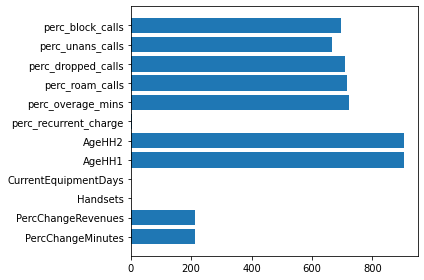

In [ ]:
plt.barh(bar_df[bar_df>0].index,bar_df[bar_df>0].values)
plt.tight_layout()
plt.show()

<b>Using KNN imputer, setting the neighbours as 5 to input the missing columns 

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(clean_dataframe),columns = clean_dataframe.columns)

In [ ]:
bar_df=df.isna().sum()
bar_df[bar_df>0]

Series([], dtype: int64)

<b>Finally the dataframe is available for prediction and model evaluation!!

In [ ]:
df

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes,Churn
0,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61.0,1.0,2.0,361.0,62.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,4.0,0.5,0.916667,0.000000,0.000000,0.003196,0.028767,0.003196,48.0,535.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58.0,1.0,2.0,1504.0,40.0,42.0,0.0,0.0,5.0,0.0,3.0,2.0,4.0,1.0,1.000589,0.000000,0.000000,0.030000,0.270000,0.000000,45.0,304.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60.0,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,6.0,0.0,2.0,3.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,434.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59.0,2.0,9.0,458.0,30.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,3.0,1.0,0.911522,0.000000,0.000000,0.039634,0.057927,0.005869,45.0,304.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,4.0,852.0,46.0,54.0,0.0,0.0,9.0,1.0,0.0,0.0,4.0,1.0,0.991832,0.000000,0.010476,0.010386,0.085748,0.023833,41.0,674.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50886,31.92,63.0,17.0,0.00,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,0.0,0.0,0.3,30.0,1.0,1.0,883.0,58.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,1.0,0.532581,0.682540,0.000000,0.011111,0.138095,0.000000,30.0,212.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
50887,50.00,492.0,50.0,0.00,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,6.7,0.0,0.3,30.0,1.0,1.0,882.0,30.8,29.2,0.0,0.0,0.0,0.0,5.0,2.0,3.0,1.0,1.000000,0.000000,0.000000,0.007520,0.085976,0.000610,30.0,540.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
50888,71.99,724.0,70.0,0.00,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,25.7,0.0,0.7,30.0,1.0,1.0,882.0,50.0,60.0,0.0,0.0,7.0,0.0,0.0,0.0,4.0,1.0,0.972357,0.005525,0.001243,0.019751,0.032182,0.001381,24.0,690.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.

## Building classification model to predict customer churn month in advance

### Initial data processing for model

In [ ]:
print("Any missing sample in training set:",df.isnull().values.any())

Any missing sample in training set: False


<b>Splitting the datframe into selection attributes and target feature

In [ ]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
X = df.drop(["Churn"], axis=1)
y = df['Churn']
X

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes
0,24.00,219.0,22.0,0.25,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,0.0,0.0,0.3,61.0,1.0,2.0,361.0,62.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,4.0,0.5,0.916667,0.000000,0.000000,0.003196,0.028767,0.003196,48.0,535.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,16.99,10.0,17.0,0.00,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,58.0,1.0,2.0,1504.0,40.0,42.0,0.0,0.0,5.0,0.0,3.0,2.0,4.0,1.0,1.000589,0.000000,0.000000,0.030000,0.270000,0.000000,45.0,304.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,38.00,8.0,38.0,0.00,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,60.0,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,6.0,0.0,2.0,3.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,434.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,82.28,1312.0,75.0,1.24,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,370.3,0.0,22.7,59.0,2.0,9.0,458.0,30.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,3.0,1.0,0.911522,0.000000,0.000000,0.039634,0.057927,0.005869,45.0,304.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,4.0,852.0,46.0,54.0,0.0,0.0,9.0,1.0,0.0,0.0,4.0,1.0,0.991832,0.000000,0.010476,0.010386,0.085748,0.023833,41.0,674.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50886,31.92,63.0,17.0,0.00,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,0.0,0.0,0.3,30.0,1.0,1.0,883.0,58.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,1.0,0.532581,0.682540,0.000000,0.011111,0.138095,0.000000,30.0,212.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
50887,50.00,492.0,50.0,0.00,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,6.7,0.0,0.3,30.0,1.0,1.0,882.0,30.8,29.2,0.0,0.0,0.0,0.0,5.0,2.0,3.0,1.0,1.000000,0.000000,0.000000,0.007520,0.085976,0.000610,30.0,540.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
50888,71.99,724.0,70.0,0.00,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,25.7,0.0,0.7,30.0,1.0,1.0,882.0,50.0,60.0,0.0,0.0,7.0,0.0,0.0,0.0,4.0,1.0,0.972357,0.005525,0.001243,0.019751,0.032182,0.001381,24.0,690.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
50889,117.49

<b>Splitting the dataset and target and test set for model evaluation and prediction and feature scaling 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<b>As we discussed earlier, the dataset is imbalanced. So it is wise to do over sampling in order to avoid the biasing of the model towards the majority class. Here, Random Over sampler is used  

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train = RandomOverSampler(random_state=123).fit_resample(X_train, y_train) 

##A simple logistic regression model to predict churn and evaluate model accuracy on test data set


<h4><b>Model Training 

In [ ]:
#-------------------------------- Model training -------------------------------#
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h4><b>Model Testing 

<b>Prediction for X_test data, confusion matrix, model accuracy, Classfication report and GINI

array([[6572, 4290],
       [1891, 2515]])

([<matplotlib.axis.XTick at 0x7fefcb220f90>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7fefcb281ad0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

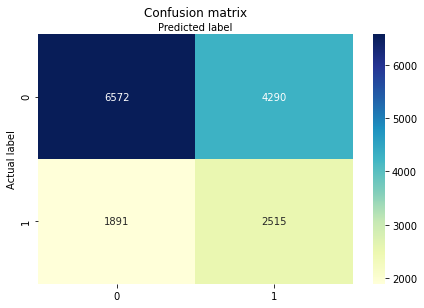

In [ ]:
#-------------------------------- Model testing ---------------------------------#
#to predict for X_test data set using the fitted model
y_pred=logreg.predict(X_test)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
#Evaluate model accuracy using fitted y value and actual y_test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5951008645533141


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.60      0.68     10862
         1.0       0.37      0.57      0.45      4406

    accuracy                           0.60     15268
   macro avg       0.57      0.59      0.56     15268
weighted avg       0.66      0.60      0.61     15268



In [ ]:
GINI = (2 * auc) - 1
print(GINI)

0.17590047484669857


<b>Prediction values and Target values 

In [ ]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head(10)

,Actual value,Predicted value
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
5,1.0,1.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


<b>Determining Probability threshold to classify customers as churners and non churners (Default = 0.5)

Prediction probabilties of the Churn 

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.57849838, 0.42150162],
       [0.57810396, 0.42189604],
       [0.47129869, 0.52870131],
       ...,
       [0.62461987, 0.37538013],
       [0.54782802, 0.45217198],
       [0.52248219, 0.47751781]])

In [ ]:
y_pred_prob[:, 1]

array([0.42150162, 0.42189604, 0.52870131, ..., 0.37538013, 0.45217198,
       0.47751781])

In [ ]:
decision_function = logreg.decision_function(X_test)

Plotting the precision and recall curve in order to estimate the probability threshold in order to tune different accuracy 

Text(0.5, 1.0, 'Precision-Recall Curve')

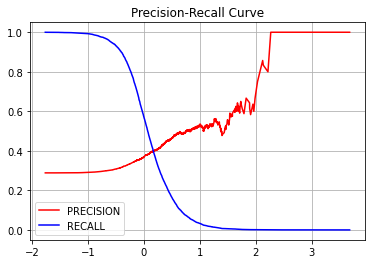

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, treshold = precision_recall_curve(y_test, decision_function)
  
# Plot the output.
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

In order to increase the precision value we have to tune the threshold such that the accuracy increases but the recall value decreases which is not favourable. So, we must select an optimum threshold value such that both the values are balanced 

In [ ]:
dt = logreg.decision_function(X_test)
  
# Set the value of decision threshold.
decision_teshold = 0.1
# Desired prediction to increase precision value.
desired_predict =[]
for i in dt:
    if i<decision_teshold:
        desired_predict.append(0)
    else:
        desired_predict.append(1)

In [ ]:

print("old precision value:", precision_score(y_test, predict_actual))  
print("new precision value:", precision_score(y_test, desired_predict))
print("old recall value:", recall_score(y_test, predict_actual)) 
print("new recall value:", recall_score(y_test, desired_predict))
print("old accuracy value:", accuracy_score(y_test, predict_actual)) 
print("new accuracy value:", accuracy_score(y_test, desired_predict))

old precision value: 0.3695652173913043
new precision value: 0.3870603723904457
old recall value: 0.5710394916023604
new recall value: 0.46709033136631867
old accuracy value: 0.5951008645533141
new accuracy value: 0.632761330888132


<b>Plotting the ROC curve and finding the area under the curve 

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Curve (ROC)')

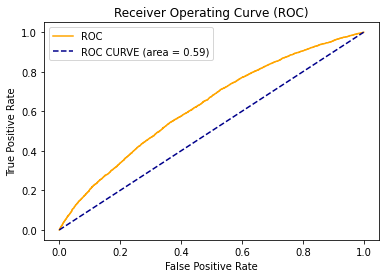

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, color = 'orange', label = "ROC")
plt.plot([0,1], [0,1], color = "darkblue", linestyle="--", label = "ROC CURVE (area = %0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Curve (ROC)")
plt.legend()
plt.show()

In [ ]:
auc = roc_auc_score(y_test,y_pred)
auc

0.5879502374233493

<b>The area under the curve is: 0.59


In [ ]:
predict_actual = logreg.predict(X_test)       # Predict using classifier.
accuracy_actual = logreg.score(X_test, y_test)
classification_report_actual = classification_report(y_test, predict_actual)
print(accuracy_actual, classification_report_actual, sep ='\n')

0.5951008645533141
              precision    recall  f1-score   support

         0.0       0.78      0.60      0.68     10862
         1.0       0.37      0.57      0.45      4406

    accuracy                           0.60     15268
   macro avg       0.57      0.59      0.56     15268
weighted avg       0.66      0.60      0.61     15268



###Building a Random Forest classifier to compare model accuracy over the logistic regression model


<b><h4>Model Training 

In [ ]:
#-------------------------------- Model training -------------------------------#
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=9,n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

<b><h4>Model Testing 

<b>Prediction for X_test data, confusion matrix, model accuracy, Classfication report and GINI

Accuracy: 0.7120120513492272


array([[10196,   666],
       [ 3731,   675]])

([<matplotlib.axis.XTick at 0x7fefcb2a4890>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7fefcb2a2e90>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

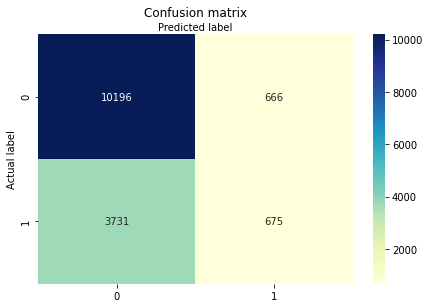

In [ ]:
#-------------------------------- Model testing ---------------------------------#
#to predict for X_test data set using the fitted RF model
y_pred1=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.73      0.94      0.82     10862
         1.0       0.50      0.15      0.23      4406

    accuracy                           0.71     15268
   macro avg       0.62      0.55      0.53     15268
weighted avg       0.67      0.71      0.65     15268



Accuracy of the model = 70.9%

In [ ]:
GINI = (2 * auc) - 1
print(GINI)

0.09188550655677608


<b>Determining Probability threshold to classify customers as churners and non churners (Default = 0.5)

In [ ]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[0.66, 0.34],
       [0.45, 0.55],
       [0.58, 0.42],
       ...,
       [0.79, 0.21],
       [0.96, 0.04],
       [0.64, 0.36]])

In [ ]:
y_pred_prob[:, 1]

array([0.34, 0.55, 0.42, ..., 0.21, 0.04, 0.36])

Plotting the precision and recall curve in order to estimate the probability threshold in order to tune different accuracy

Text(0.5, 1.0, 'Precision-Recall Curve')

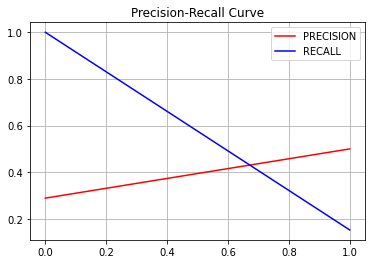

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, treshold = precision_recall_curve(y_test, y_pred1)
  
# Plot the output.
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

In order to increase the precision value we have to tune the threshold such that the accuracy increases but the recall value decreases which is not favourable. So, we must select an optimum threshold value such that both the values are balanced

In [ ]:
threshold = 0.52564546546

predicted_proba = clf.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)

In [ ]:
print("old precision value:", precision_score(y_test, y_pred1))
print("new precision value:", precision_score(y_test, predicted))
print("old recall value:", recall_score(y_test, y_pred1))  
print("new recall value:", recall_score(y_test, predicted))
print("old accuracy value:", accuracy_score(y_test, y_pred1)) 
print("new accuracy value:", accuracy_score(y_test, predicted))

old precision value: 0.4996276991809382
new precision value: 0.5131995776135164
old recall value: 0.15229232864275988
new recall value: 0.11030413073082161
old accuracy value: 0.7113570867173172
new accuracy value: 0.7130599947602829


<b>Plotting the ROC curve and finding the area under the curve

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Curve (ROC)')

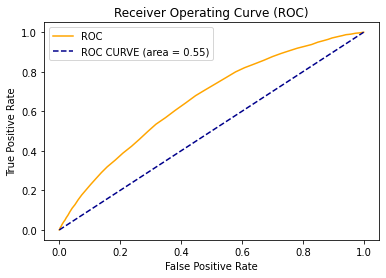

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, color = 'orange', label = "ROC")
plt.plot([0,1], [0,1], color = "darkblue", linestyle="--", label = "ROC CURVE (area = %0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Curve (ROC)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test,y_pred1)
auc

0.545942753278388

<b>The area under the curve is: 0.59

<h4><b>Optimizing the Model using hyperparameter tuning using Randomized Search CV

<b>Creating the param grid 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 265, 510, 755, 1000]}


<b>Using 10 fold cross validation, the best parameters are found using random search. Scoring parameter is negative mean squared error 

In [ ]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 44.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=50,
                                                    max_features=5,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                    

<b>Parameters with least mean test score is chosen 

In [ ]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.6420608301082246 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.6420608301082246 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.2746389279839221 {'n_estimators': 265, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.28947671552390936 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.6443266628176928 {'n_estimators': 755, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.23482114648645358 {'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.2605067962365461 {'n_estimators': 755, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.24600340111468427 {'n_estimators': 755, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.6442961017356332 {'n_estimators': 510, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.24696226926333684 {'n_estimators': 510, 'mi

<b>Final parameters 

In [ ]:
rf_random.best_params_

{'max_depth': 45,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 1000}

<b>The model is trained again using the tuned parameters 

In [ ]:
clf2=RandomForestClassifier(max_depth = 45,
  max_features= 'sqrt',
  min_samples_split= 5,
  n_estimators = 1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<b>Classification report for the fine tuned model 

In [ ]:
predict_actual = clf2.predict(X_test)       # Predict using classifier.
accuracy_actual = clf2.score(X_test, y_test)
classification_report_actual = classification_report(y_test, predict_actual)
print(accuracy_actual, classification_report_actual, sep ='\n')

0.7150248886560125
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83     10862
         1.0       0.52      0.15      0.23      4406

    accuracy                           0.72     15268
   macro avg       0.63      0.55      0.53     15268
weighted avg       0.67      0.72      0.65     15268



**Observations**
<br>
1. The accuracy has increased from 70% to 72% 
2. We have a better precision and recall score 

<mark>__Result:__
    
1. The accuracy of the logistic regression model is 60%
2. The accuray of the Random forest model is 72% 
3. Logistic regression gives a mediocre accuracy even though after doing oversampling 
4. Random forest gives a good accuracy after doing oversampling. 
5. The precision and recall score for the Random forest model is better compared to Logistic Regression. 
6. Even though random forest model needs more parameter tuning, it is still a  good model compared to Logistic regression. <br><br>
<b>Thus, it is infered that Random forest model yields a better accuracy and performance metrics compared to Logistic Regression 

### Identifying the most important features impacting churn

In [ ]:
importances = rf_random.best_estimator_.feature_importances_
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
df.head(20)

,importance,feature
0,0.060411,CurrentEquipmentDays
1,0.048734,MonthsInService
2,0.046294,PercChangeMinutes
3,0.044185,MonthlyMinutes
4,0.043187,perc_recurrent_charge
5,0.040619,MonthlyRevenue
6,0.040393,PercChangeRevenues
7,0.039366,perc_unans_calls
8,0.038968,City_Neighborhood
9,0.038665,perc_dropped_calls


##Using the hold out data provided to predict churners using the best model identified

<h3><b>I am going to do the same feature engineering and data manipulation techniques as I did for the training dataset. So, I am gonna skip the comments and jump straight away to the prediction of Customer churn using the test dataset

In [ ]:
test_df=pd.read_csv("/Telecom - Prediction Data.csv")

In [ ]:
test_df.shape

(20000, 58)

In [ ]:
test_df.size

1160000

In [ ]:
test_df.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,2.000000e+04,0.0,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,3.201925e+06,NaN,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,6.00466,4.017420,28.526345,1.854365,0.295430,115.280595,25.443640,8.170585,90.661230,68.245900,10.127090,0.010585,1.879430,18.736950,1.522900,1.344800,1.816200,1.569550,379.550450,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250
std,1.165204e+05,NaN,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,8.91097,9.932891,38.975750,5.323652,1.146122,165.847979,34.991026,16.140458,104.834556,94.785113,15.217792,0.471100,5.483907,9.755645,0.854524,0.618896,1.348669,0.914223,255.552901,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312
min,3.000006e+06,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.100522e+06,NaN,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,0.70000,0.000000,5.300000,0.000000,0.000000,8.700000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,3.201338e+06,NaN,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,3.00000,1.000000,16.300000,0.000000,0.000000,51.900000,13.700000,2.000000,61.700000,35.300000,5.700000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,331.000000,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000
75%,3.304237e+06,NaN,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,7.70000,3.700000,37.000000,1.700000,0.300000,155.725000,33.700000,9.000000,121.000000,89.300000,12.700000,0.000000,1.700000,24.000000,2.000000,2.000000,2.000000,2.000000,513.000000,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000
max,3.399986e+06,NaN,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,195.30000,313.000000,676.700000,365.700000,55.700000,3287.200000,610.300000,282.700000,1311.700000,1572.700000,489.700000,54.700000,195.000000,61.000000,11.000000,7.000000,28.000000,16.000000,1823.000000,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000


In [ ]:
test_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,LAXCOR909,1,1,773,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,26.7,4.3,0.0,235.4,35.0,3.3,146.3,115.3,22.3,0.0,6.3,25,1,1,LAXLAG949,3,2,32,28.0,48.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [ ]:
percent_missing = test_df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': test_df.columns,
                                 'percent_missing': percent_missing}) 
missing_value_df

,column_name,percent_missing
CustomerID,CustomerID,0.000000
Churn,Churn,39.299680
MonthlyRevenue,MonthlyRevenue,0.117899
MonthlyMinutes,MonthlyMinutes,0.117899
TotalRecurringCharge,TotalRecurringCharge,0.117899
DirectorAssistedCalls,DirectorAssistedCalls,0.117899
OverageMinutes,OverageMinutes,0.117899
RoamingCalls,RoamingCalls,0.117899
PercChangeMinutes,PercChangeMinutes,0.265273
PercChangeRevenues,PercChangeRevenues,0.265273


In [ ]:
def create_features(test_df):
    test_df['perc_active_subs'] = test_df['ActiveSubs'] / test_df['UniqueSubs']
    test_df['perc_recurrent_charge']= test_df['TotalRecurringCharge'] / test_df['MonthlyRevenue']
    test_df['perc_overage_mins'] = test_df['OverageMinutes'] / test_df['MonthlyMinutes']
    test_df['perc_roam_calls'] = test_df['RoamingCalls'] / test_df['MonthlyMinutes']
    test_df['perc_dropped_calls'] = test_df['DroppedCalls'] / test_df['MonthlyMinutes']
    test_df['perc_unans_calls'] = test_df['UnansweredCalls'] / test_df['MonthlyMinutes']
    test_df['perc_block_calls'] = test_df['BlockedCalls'] / test_df['MonthlyMinutes']
    return test_df

In [ ]:
test_df=create_features(test_df)

In [ ]:
test_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619,0.000000,0.017184,0.126915,0.002070
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000,0.000000,0.017018,0.135088,0.001228
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235,0.000000,0.012223,0.169394,0.002887
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575,0.000000,0.013072,0.113072,0.004575
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000,0.001072,0.002226,0.036026,0.004946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,0,No,0,40,No,1-Highest,Other,Other,Unknown,0.666667,1.033470,0.001227,0.000491,0.014724,0.018773,0.000000
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,LAXCOR909,1,1,773,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,26.7,4.3,0.0,235.4,35.0,3.3,146.3,115.3,22.3,0.0,6.3,25,1,1,LAXLAG949,3,2,32,28.0,48.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,150,No,3-Good,Other,Other,Unknown,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df = test_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make_States = LabelEncoder()
lb_make_City_Neighborhood = LabelEncoder()
final_df['States']  = final_df['ServiceArea'].str[0:3]
final_df['City_Neighborhood']  = final_df['ServiceArea'].str[-6:]
final_df['States'] = lb_make_States.fit_transform(final_df['States'].astype(str))
final_df['City_Neighborhood'] = lb_make_City_Neighborhood.fit_transform(final_df['City_Neighborhood'].astype(str))
final_df =  final_df.drop(["ServiceArea","Churn"], axis=1)

In [ ]:
binary_cols=[]
multi_Value=[]
for col in final_df.columns :
    if final_df[col].dtype =='object':
        if final_df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)

In [ ]:
binary_cols

['ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

In [ ]:
multi_Value

['HandsetPrice', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

In [ ]:
for col in multi_Value:
    print(col , final_df[col].unique())

HandsetPrice ['150' '80' '10' '200' '130' '30' '400' '60' 'Unknown' '100' '40' '300'
 '250' '180' '240' '500']
CreditRating ['5-Low' '1-Highest' '3-Good' '4-Medium' '2-High' '6-VeryLow' '7-Lowest']
PrizmCode ['Other' 'Suburban' 'Town' 'Rural']
Occupation ['Other' 'Professional' 'Crafts' 'Retired' 'Clerical' 'Self' 'Homemaker'
 'Student']
MaritalStatus ['No' 'Yes' 'Unknown']


In [ ]:
for col in binary_cols:
    print(col , final_df[col].unique())

ChildrenInHH ['No' 'Yes']
HandsetRefurbished ['No' 'Yes']
HandsetWebCapable ['Yes' 'No']
TruckOwner ['Yes' 'No']
RVOwner ['Yes' 'No']
Homeownership ['Unknown' 'Known']
BuysViaMailOrder ['Yes' 'No']
RespondsToMailOffers ['Yes' 'No']
OptOutMailings ['No' 'Yes']
NonUSTravel ['No' 'Yes']
OwnsComputer ['No' 'Yes']
HasCreditCard ['Yes' 'No']
NewCellphoneUser ['No' 'Yes']
NotNewCellphoneUser ['Yes' 'No']
OwnsMotorcycle ['No' 'Yes']
MadeCallToRetentionTeam ['No' 'Yes']


In [ ]:
final_df[final_df['HandsetPrice']=='Unknown'].shape[0]/final_df.shape[0]

0.56335

In [ ]:
final_df[final_df['HandsetPrice']=='Unknown'].shape

(11267, 65)

In [ ]:
final_df.drop('HandsetPrice',axis=1, inplace=True)
multi_Value.remove('HandsetPrice')

In [ ]:
final_df[final_df['Homeownership']=='Unknown'].shape[0]/final_df.shape[0]

0.3261

In [ ]:
final_df.drop('Homeownership',axis=1, inplace=True)
binary_cols.remove('Homeownership')

In [ ]:
final_df[final_df['MaritalStatus']=='Unknown'].shape[0]/final_df.shape[0]

0.382

In [ ]:
final_df.drop('MaritalStatus',axis=1, inplace=True)
multi_Value.remove('MaritalStatus')

In [ ]:
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.7:
            print(index,value)
high_corr_and_check(final_df)

('Handsets', 'HandsetModels') 0.8935537366578562
('MonthlyMinutes', 'ReceivedCalls') 0.8425023207527328
('UniqueSubs', 'ActiveSubs') 0.7938277293389522
('MonthlyRevenue', 'OverageMinutes') 0.7906944585501059
('BlockedCalls', 'DroppedBlockedCalls') 0.7818719942814396
('MonthlyMinutes', 'PeakCallsInOut') 0.7747398931342483
('MonthlyMinutes', 'OffPeakCallsInOut') 0.7673702268591357
('OutboundCalls', 'OffPeakCallsInOut') 0.759298360156455
('CustomerID', 'MonthsInService') 0.7561584617444386
('ReceivedCalls', 'PeakCallsInOut') 0.7467049090519338
('ReceivedCalls', 'OffPeakCallsInOut') 0.7400300562335426
('OutboundCalls', 'InboundCalls') 0.7292495184970917
('UnansweredCalls', 'OffPeakCallsInOut') 0.7236979704201146
('DroppedCalls', 'DroppedBlockedCalls') 0.7233419669640991
('OutboundCalls', 'PeakCallsInOut') 0.7211413133952398
('RetentionCalls', 'RetentionOffersAccepted') 0.7166783589303132
('MonthlyMinutes', 'OutboundCalls') 0.7120307414503667
('MonthlyRevenue', 'MonthlyMinutes') 0.707644298

In [ ]:
final_df = final_df.drop(['HandsetModels','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls',
             'RetentionCalls','InboundCalls','CustomerID'],axis=1)

In [ ]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from imblearn.over_sampling import BorderlineSMOTE
LE_cat = LabelEncoder() 
for i in multi_Value:
    final_df[i] = LE_cat.fit_transform(final_df[i].astype(str))
final_df

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,0.0,5.7,56,1,1,7,240,30.0,0.0,No,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,0,No,Yes,0,5,No,1,No,4,0,3,1.000000,0.643590,0.047619,0.000000,0.017184,0.126915,0.002070,26,385
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.0,0.0,57,1,1,6,434,56.0,0.0,No,No,Yes,No,No,No,No,No,No,Yes,Yes,0,Yes,No,0,6,No,2,No,0,0,4,1.000000,1.303639,0.000000,0.000000,0.017018,0.135088,0.001228,32,581
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.0,4.0,55,1,1,3,700,38.0,24.0,No,No,No,No,No,No,No,No,No,No,No,0,Yes,No,0,4,No,3,No,2,2,1,1.000000,0.513663,0.404235,0.000000,0.012223,0.169394,0.002887,26,385
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,0.0,0.3,59,3,2,6,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,0,No,Yes,0,4,No,1,No,0,0,3,0.666667,0.842933,0.104575,0.000000,0.013072,0.113072,0.004575,52,551
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,0.0,4.3,52,1,1,4,408,58.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,No,Yes,0,3,No,0,No,0,2,3,1.000000,0.904650,0.000000,0.001072,0.002226,0.036026,0.004946,40,597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,0.0,0.0,27,3,2,3,230,64.0,64.0,No,No,Yes,No,No,No,No,No,No,No,Yes,0,No,No,0,0,No,0,No,0,0,3,0.666667,1.033470,0.001227,0.000491,0.014724,0.018773,0.000000,23,609
19996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,25,1,1,1,773,34.0,26.0,No,No,Yes,No,No,No,No,No,No,Yes,Yes,0,No,No,0,6,No,0,No,0,2,3,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,23,500
19997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.0,0.0,25,1,1,1,773,0.0,0.0,No,No,Yes,No,No,No,No,No,No,No,Yes,0,Yes,No,0,8,No,1,No,0,2,3,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,23,138
19998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,26.7,4.3,0.0,235.4,35.0,0.0,6.3,25,1,1,3,32,28.0,48.0,No,No,Yes,No,No,No,No,No,No,No,Yes,0,No,No,0,3,No,0,No,2,0,3,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,23,323


In [ ]:
Binary_cols_expect_churn=binary_cols[0:]
final_df_yes_no=final_df[Binary_cols_expect_churn]
final_df_yes_no

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam
0,No,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,Yes,No,No
1,No,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
3,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No
4,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No
19996,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No
19997,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No
19998,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No


In [ ]:
final_dfDummies = pd.get_dummies(final_df_yes_no, prefix = final_df_yes_no.columns)
final_dfDummies.shape

(20000, 30)

In [ ]:
removed_binary_cols=final_df.drop(binary_cols,axis=1)
removed_binary_cols.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,0.0,5.7,56,1,1,7,240,30.0,0.0,0,0,5,1,4,0,3,1.000000,0.643590,0.047619,0.000000,0.017184,0.126915,0.002070,26,385
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.0,0.0,57,1,1,6,434,56.0,0.0,0,0,6,2,0,0,4,1.000000,1.303639,0.000000,0.000000,0.017018,0.135088,0.001228,32,581
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.0,4.0,55,1,1,3,700,38.0,24.0,0,0,4,3,2,2,1,1.000000,0.513663,0.404235,0.000000,0.012223,0.169394,0.002887,26,385
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,0.0,0.3,59,3,2,6,48,46.0,0.0,0,0,4,1,0,0,3,0.666667,0.842933,0.104575,0.000000,0.013072,0.113072,0.004575,52,551
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,0.0,4.3,52,1,1,4,408,58.0,0.0,0,0,3,0,0,2,3,1.000000,0.904650,0.000000,0.001072,0.002226,0.036026,0.004946,40,597


In [ ]:
clean_dataframe=pd.concat([removed_binary_cols, final_dfDummies], axis=1)

In [ ]:
clean_dataframe.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,0.0,5.7,56,1,1,7,240,30.0,0.0,0,0,5,1,4,0,3,1.000000,0.643590,0.047619,0.000000,0.017184,0.126915,0.002070,26,385,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.0,0.0,57,1,1,6,434,56.0,0.0,0,0,6,2,0,0,4,1.000000,1.303639,0.000000,0.000000,0.017018,0.135088,0.001228,32,581,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.0,4.0,55,1,1,3,700,38.0,24.0,0,0,4,3,2,2,1,1.000000,0.513663,0.404235,0.000000,0.012223,0.169394,0.002887,26,385,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,0.0,0.3,59,3,2,6,48,46.0,0.0,0,0,4,1,0,0,3,0.666667,0.842933,0.104575,0.000000,0.013072,0.113072,0.004575,52,551,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,0.0,4.3,52,1,1,4,408,58.0,0.0,0,0,3,0,0,2,3,1.000000,0.904650,0.000000,0.001072,0.002226,0.036026,0.004946,40,597,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0


In [ ]:
clean_dataframe.replace([np.inf, -np.inf], np.nan, inplace=True)

Missing Values (KNN Imputer)

In [ ]:
bar_final_df=final_df.isna().sum()
bar_final_df[bar_final_df>0]

MonthlyRevenue            60
MonthlyMinutes            60
TotalRecurringCharge      60
DirectorAssistedCalls     60
OverageMinutes            60
RoamingCalls              60
PercChangeMinutes        135
PercChangeRevenues       135
AgeHH1                   335
AgeHH2                   335
perc_recurrent_charge     62
perc_overage_mins        354
perc_roam_calls          351
perc_dropped_calls       348
perc_unans_calls         321
perc_block_calls         341
dtype: int64

<BarContainer object of 16 artists>

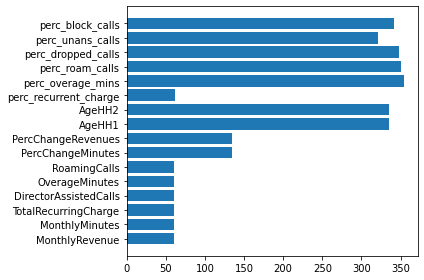

In [ ]:
plt.barh(bar_final_df[bar_final_df>0].index,bar_final_df[bar_final_df>0].values)
plt.tight_layout()
plt.show()

In [ ]:
imputer = KNNImputer(n_neighbors=5)
final_df = pd.DataFrame(imputer.fit_transform(clean_dataframe),columns = clean_dataframe.columns)

In [ ]:
bar_final_df=final_df.isna().sum()
bar_final_df[bar_final_df>0]

Series([], dtype: int64)

In [ ]:

final_df

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_roam_calls,perc_dropped_calls,perc_unans_calls,perc_block_calls,States,City_Neighborhood,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,RVOwner_Yes,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,NonUSTravel_No,NonUSTravel_Yes,OwnsComputer_No,OwnsComputer_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,OwnsMotorcycle_No,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes
0,57.490,483.0,37.0,0.250,0.00,532.0,51.00,8.3,1.0,61.3,1.7,0.3,46.3,0.0,5.7,56.0,1.0,7.0,240.0,30.0,0.0,0.0,0.0,5.0,1.0,4.0,0.0,3.0,1.000000,0.643590,0.047619,0.000000,0.017184,0.126915,0.002070,26.0,385.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,55.230,570.0,72.0,0.000,0.00,38.0,0.00,9.7,0.7,77.0,8.7,0.0,14.7,0.0,0.0,57.0,1.0,6.0,434.0,56.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,4.0,1.000000,1.303639,0.000000,0.000000,0.017018,0.135088,0.001228,32.0,581.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,97.340,1039.0,50.0,4.950,0.00,198.0,23.30,12.7,3.0,176.0,11.3,0.3,103.3,0.0,4.0,55.0,1.0,3.0,700.0,38.0,24.0,0.0,0.0,4.0,3.0,2.0,2.0,1.0,1.000000,0.513663,0.404235,0.000000,0.012223,0.169394,0.002887,26.0,385.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,35.590,153.0,30.0,0.000,0.00,30.0,7.30,2.0,0.7,17.3,0.0,0.0,8.0,0.0,0.3,59.0,2.0,6.0,48.0,46.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,0.666667,0.842933,0.104575,0.000000,0.013072,0.113072,0.004575,52.0,551.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,55.270,1213.0,50.0,0.740,1.30,169.0,1.00,2.7,6.0,43.7,4.3,0.0,50.7,0.0,4.3,52.0,1.0,4.0,408.0,58.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,1.000000,0.904650,0.000000,0.001072,0.002226,0.036026,0.004946,40.0,597.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85.150,815.0,88.0,0.000,0.40,0.0,0.00,12.0,0.0,15.3,0.0,1.3,9.0,0.0,0.0,27.0,2.0,3.0,230.0,64.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.666667,1.033470,0.001227,0.000491,0.014724,0.018773,0.000000,23.0,609.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19996,41.084,117.8,36.2,0.198,3.52,-48.6,1.40,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,1.0,773.0,34.0,26.0,0.0,0.0,6.0,0.0,0.0,2.0,3.0,1.000000,0.894022,0.041841,0.025408,0.007625,0.049303,0.002341,23.0,500.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19997,50.740,140.4,31.4,0.644,7.56,-87.0,-21.02,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,25.0,1.0,1.0,773.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,2.0,3.0,1.000000,0.682296,0.151981,0.044103,0.006238,0.070460,0.032168,23.0,138.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.

<h4><b>As the final test dataset is ready, let's do the prediction of the customer churn using the model trained using the training dataset. 

In [ ]:
print("Any missing sample in data set:",final_df.isnull().values.any())

Any missing sample in data set: True


<b>Doing feature scaling for the test dataset 

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
sc = StandardScaler()
final_df = sc.fit_transform(final_df)

<b>Creating a dataframe "prediction" to store the predicted values for the relevent Customer 

In [ ]:
final_df['Churn'] = clf.predict(final_df)
final_df['CustomerID'] = cust_df["CustomerID"]
prediction = final_df[['CustomerID','Churn']]
prediction.to_csv("submission.csv", index=False)
prediction.tail()

,CustomerID,Churn
19995,3399938,0.0
19996,3399950,0.0
19997,3399966,0.0
19998,3399970,0.0
19999,3399986,0.0


In [ ]:
prediction['Churn'].unique()

array([0., 1.])

<b>Customer churned rate using prediction from the test dataset 

In [ ]:
churned= prediction[prediction['Churn']=='Yes'].shape[0]
notchurned= prediction[prediction['Churn']=='No'].shape[0]

([<matplotlib.patches.Wedge at 0x7f17023a0950>,
 [Text(0.7423650635745702, 0.9428118117545645, 'Churned'),
  Text(-0.6805013891930646, -0.864244097061883, 'Not Churned')],
 [Text(0.43304628708516596, 0.5499735568568294, '28.8%'),
  Text(-0.37118257592348974, -0.47140587112466337, '71.2%')])

Text(0.5, 1.0, 'Percentage of customer churned')

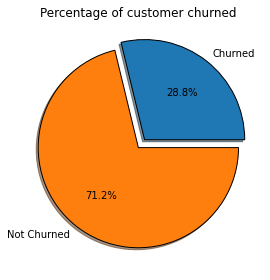

In [ ]:
slices=[churned,notchurned]
labels=['Churned','Not Churned']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of customer churned")
plt.tight_layout()
plt.show()

<h2><b>Final Observations</b></h2>

<h3><b>From EDA:</b></h3>

1. As we can see we have good percent of data for Churn customer, which is good and makes this dataset good for further analysis.
2. We have too active subscribers and all attributes of the dataset are customer level attribute and not subscriber level attributes.
3. Its an even revenue distribution so we are losing customer across all revenue groups. Moreover it is similar pattern to non churn customers.
4. If customer is earning high but has lot of debt , then credit class will be low for such customer.
5. From both credit class distribution and income distribution, both churn and non churn customer has similar distribution, may be population also has similar distribution. We don’t have any credit class or income group with significant more chrun than other group.
6. Retention policy plays very important role in keeping customer with existing service providers. Usually if customer is not satisfied with service they will make a call to call center and then it will be responsibility of Call center representative to convince the customer.
We can see only 1745 has made retention call , out of total 51047 customers. and out of which only 881 has accepted the offer, so roughly 50% has accepted the retention offer.
7. We can see out of 1745 customer which made call to call center , 959 are retain. which is 55%.
8. So we can conclude, retention call and retention offers both are very effective for retaining customer and reducing churn.
9. We are losing customer across all income segment, and across revenue groups. so wide spread retention measures are required covering all groups.
10. Retention calls & retention offers are effective. So if we get good churn prediction model, we can proactively make retention call or offer them with retention offer, further reducing churn.

<h3><b>From Model Comparison:</b></h3>

1. The accuracy of the logistic regression model is 60%
2. The accuray of the Random forest model is 72% 
3. Logistic regression gives a mediocre accuracy even though after doing oversampling 
4. Random forest gives a good accuracy after doing oversampling. 
5. The precision and recall score for the Random forest model is better compared to Logistic Regression. 
6. Even though random forest model needs more parameter tuning, it is still a  good model compared to Logistic regression. <br><br>
Thus, it is infered that Random forest model yields a better accuracy and performance metrics compared to Logistic Regression. 

<h3><b>Suggestions:</b></h3>

1. We can use bagging or boosting methods to observe the accuracy of the model and find whether it yields performance metrics. 
2. As the dataset involves a large number of features, some having high cardinality, I believe boosting algorithms can do better than logictic regression and Random forests. 
3. Also some are feature engineeirng techniques are entertained to improve the model accuracy. 
4. Also, we can also reduce the number of features using dimensionality reduction algorithms such as Principle component analysis to discard the least important features.
5. Using XGBoost with hyper parameter tuning can give a good accuracy and using AdaBoost is also entertained for this dataset. 


<h2><b>Thank you!!